# PHARMACITY DATA VISUALIZATION

# IMPORT CÁC THƯ VIỆN CẦN THIẾT 


In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from pymongo import MongoClient

# TRỰC QUAN BỘ DỮ LIỆU TRƯỚC KHI XỬ LÝ 


 Đang đọc dữ liệu thô từ: products_final_all.json...
✅ Thống kê sơ bộ:
                    Category  Count
0                      Thuốc   4402
1  Thực phẩm bảo vệ sức khỏe    653
2           Chăm sóc cá nhân    412
3           Chăm sóc sắc đẹp    365
4          Chăm sóc sức khỏe    294
5                   Mẹ và bé     69
6              Thiết bị y tế     50


C:\Users\Admin\AppData\Local\Temp\ipykernel_50976\2530026855.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


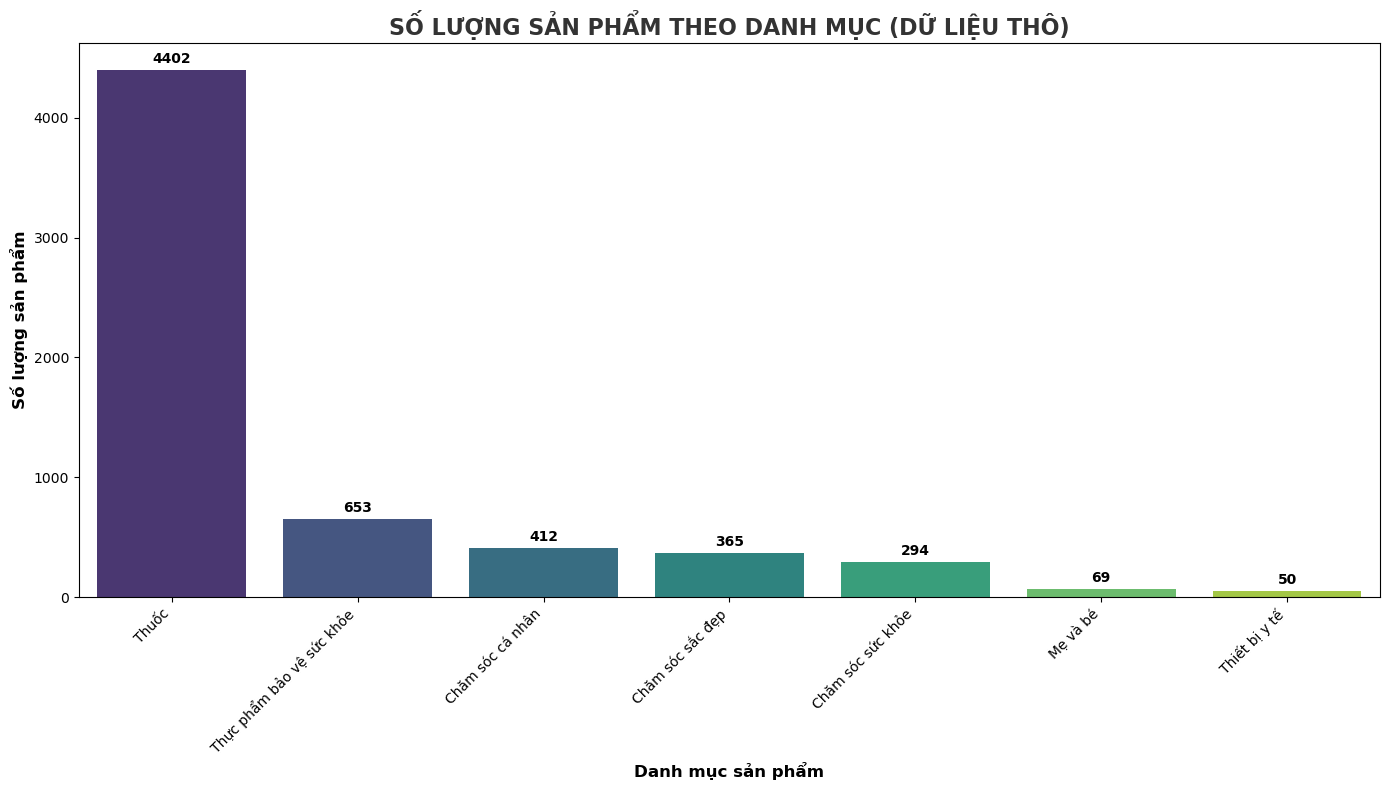

 Đã vẽ xong biểu đồ cho 6245 sản phẩm!


In [5]:

# --- CẤU HÌNH ---
# Đường dẫn đến file JSON gốc (Dữ liệu thô)
FILE_PATH = r"products_final_all.json"

def plot_categories():
    # 1. Kiểm tra file tồn tại
    if not os.path.exists(FILE_PATH):
        print(f" Không tìm thấy file: {FILE_PATH}")
        return

    print(f" Đang đọc dữ liệu thô từ: {FILE_PATH}...")

    # 2. Đọc dữ liệu JSON
    try:
        with open(FILE_PATH, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # Chuyển sang DataFrame để dễ xử lý
        df = pd.DataFrame(data)
        
        # Kiểm tra xem cột CATEGORY có tồn tại không
        if 'CATEGORY' not in df.columns:
            print(" Lỗi: Không tìm thấy cột 'CATEGORY' trong dữ liệu.")
            return

        # 3. Thống kê số lượng sản phẩm theo Danh mục
        # Đếm số lần xuất hiện của từng Category
        category_counts = df['CATEGORY'].value_counts().reset_index()
        category_counts.columns = ['Category', 'Count'] # Đổi tên cột cho đẹp

        print("✅ Thống kê sơ bộ:")
        print(category_counts)

        # 4. Vẽ biểu đồ cột (Bar Chart)
        plt.figure(figsize=(14, 8)) # Kích thước ảnh (Rộng x Cao)
        
        # Vẽ cột bằng Seaborn cho đẹp
        ax = sns.barplot(
            data=category_counts, 
            x='Category', 
            y='Count', 
            palette='viridis' # Chọn bảng màu xanh đẹp mắt
        )

        # --- TRANG TRÍ BIỂU ĐỒ ---
        plt.title('SỐ LƯỢNG SẢN PHẨM THEO DANH MỤC (DỮ LIỆU THÔ)', fontsize=16, fontweight='bold', color='#333333')
        plt.xlabel('Danh mục sản phẩm', fontsize=12, fontweight='bold')
        plt.ylabel('Số lượng sản phẩm', fontsize=12, fontweight='bold')
        
        # Xoay tên danh mục 45 độ để không bị chồng chéo
        plt.xticks(rotation=45, ha='right')
        
        # Thêm số liệu cụ thể trên đầu mỗi cột
        for i in ax.containers:
            ax.bar_label(i, padding=3, fontsize=10, fontweight='bold')

        # Căn chỉnh lề tự động để không bị mất chữ
        plt.tight_layout()
        
        # Hiển thị biểu đồ
        plt.show()
        
        print(f" Đã vẽ xong biểu đồ cho {len(df)} sản phẩm!")

    except Exception as e:
        print(f" Có lỗi xảy ra: {e}")

if __name__ == "__main__":
    plot_categories()

# CÁC SẢN PHẨM TRÙNG LẶP

 Tìm thấy 5 nhóm trùng (bao gồm cả Unknown).
  Product ID  Frequency
0    Unknown         37
1     P15342          2
2     P08733          2
3     P01392          2
4     P18098          2


C:\Users\Admin\AppData\Local\Temp\ipykernel_50976\3726066668.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


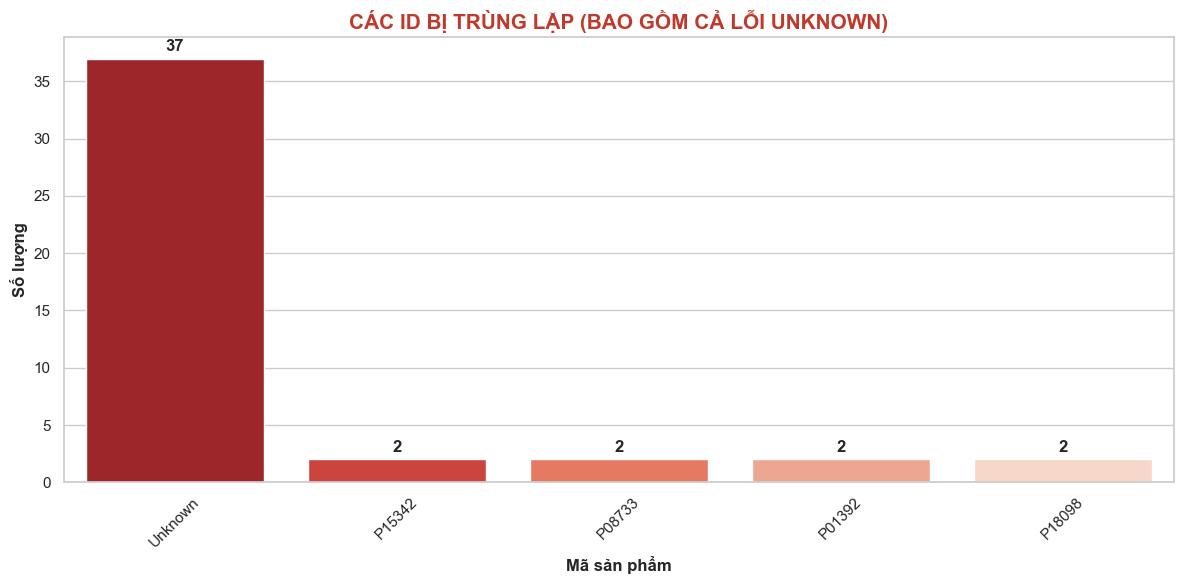

In [14]:


# --- CẤU HÌNH ---
FILE_PATH = r"products_final_all.json"

def plot_all_duplicates_including_unknown():
    if not os.path.exists(FILE_PATH):
        print(f" Không tìm thấy file: {FILE_PATH}")
        return

    try:
        with open(FILE_PATH, 'r', encoding='utf-8') as f:
            data = json.load(f)
        df = pd.DataFrame(data)
    except Exception as e:
        print(f" Lỗi đọc file: {e}")
        return

    # --- SỬA ĐỔI Ở ĐÂY: KHÔNG LỌC BỎ UNKNOWN NỮA ---
    # Chỉ cần đếm số lần xuất hiện của cột ID
    # (Nhớ đảm bảo cột tên là 'ID' hoặc 'original_id' tùy file của bạn)
    col_name = 'ID' if 'ID' in df.columns else 'original_id'
    
    id_counts = df[col_name].value_counts()
    
    # Lấy những ID xuất hiện > 1 lần
    duplicates = id_counts[id_counts > 1].reset_index()
    duplicates.columns = ['Product ID', 'Frequency']
    
    print(f" Tìm thấy {len(duplicates)} nhóm trùng (bao gồm cả Unknown).")
    print(duplicates.head())

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))
    sns.set_theme(style="whitegrid")

    ax = sns.barplot(
        data=duplicates,
        x='Product ID',
        y='Frequency',
        palette='Reds_r'
    )

    plt.title('CÁC ID BỊ TRÙNG LẶP (BAO GỒM CẢ LỖI UNKNOWN)', fontsize=15, fontweight='bold', color='#c0392b')
    plt.xlabel('Mã sản phẩm', fontsize=12, fontweight='bold')
    plt.ylabel('Số lượng', fontsize=12, fontweight='bold')
    
    # Hiện số trên đầu cột
    for i in ax.containers:
        ax.bar_label(i, padding=3, fontweight='bold')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_all_duplicates_including_unknown()

# DỮ LIỆU SAU KHI ĐÃ XỬ LÝ 

✨ Đang kiểm tra cấu trúc dữ liệu trong MongoDB...
 Các trường dữ liệu hiện có: ['_id', 'original_id', 'name', 'category', 'price', 'price_source', 'unit', 'image_url', 'metrics', 'description', 'specs', 'reviews', 'source_url']
 Đã tìm thấy trường danh mục: 'category'

 BÁO CÁO NGHIỆM THU DỮ LIỆU (FINAL)
 Tổng số sản phẩm: 6204
 Số lỗi Unknown ID: 0
 Số lỗi trùng lặp:  0
 KẾT QUẢ: DỮ LIỆU SẠCH HOÀN TOÀN!


C:\Users\Admin\AppData\Local\Temp\ipykernel_50976\692043802.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


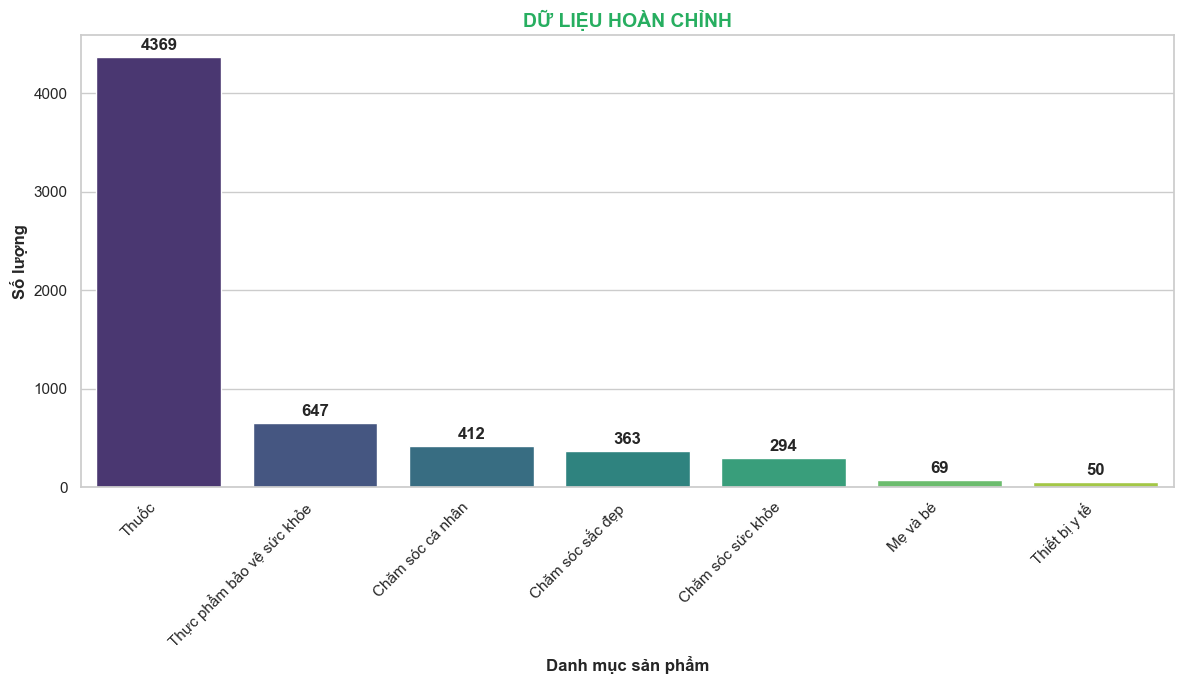

In [18]:


# --- CẤU HÌNH ---
client = MongoClient("mongodb://localhost:27017/")
db = client["pharmacity_db"]
col = db["products"]

def visualize_clean_data_final():
    print("✨ Đang kiểm tra cấu trúc dữ liệu trong MongoDB...")
    
    # 1. KIỂM TRA TÊN CỘT THỰC TẾ (DEBUG STEP)
    sample_doc = col.find_one()
    if not sample_doc:
        print(" Database rỗng! Bạn hãy kiểm tra lại kết nối.")
        return

    print(f" Các trường dữ liệu hiện có: {list(sample_doc.keys())}")
    
    # Tự động tìm trường chứa thông tin danh mục (Category)
    cat_col = None
    possible_names = ['category', 'CATEGORY', 'Category', 'breadcrumbs', 'bread_crumbs']
    
    for name in possible_names:
        if name in sample_doc:
            cat_col = name
            print(f" Đã tìm thấy trường danh mục: '{cat_col}'")
            break
            
    if cat_col is None:
        print(" Lỗi: Không tìm thấy trường nào tên là 'category' hay tương tự.")
        print(" Bạn hãy nhìn dòng 'Các trường dữ liệu hiện có' ở trên để xem tên đúng là gì và sửa vào code.")
        return

    # Tự động tìm trường ID
    id_col = 'ID' if 'ID' in sample_doc else 'original_id'

    # 2. LẤY DỮ LIỆU SẠCH
    # Chỉ lấy đúng cái cột tên đã tìm thấy
    cursor = col.find({}, {"_id": 0, cat_col: 1, id_col: 1})
    df = pd.DataFrame(list(cursor))

    # 3. BÁO CÁO CHẤT LƯỢNG (QUALITY REPORT)
    total_products = len(df)
    unknown_count = df[df[id_col].isin(['Unknown', '', None])].shape[0]
    duplicate_count = df.duplicated(subset=[id_col]).sum()
    
    print("\n" + "="*50)
    print(f" BÁO CÁO NGHIỆM THU DỮ LIỆU (FINAL)")
    print("="*50)
    print(f" Tổng số sản phẩm: {total_products}")
    print(f" Số lỗi Unknown ID: {unknown_count}")
    print(f" Số lỗi trùng lặp:  {duplicate_count}")
    
    if unknown_count == 0 and duplicate_count == 0:
        status_msg = " KẾT QUẢ: DỮ LIỆU SẠCH HOÀN TOÀN!"
        color_status = '#27ae60' # Xanh lá
    else:
        status_msg = " KẾT QUẢ: VẪN CÒN DỮ LIỆU RÁC CẦN XỬ LÝ."
        color_status = '#c0392b' # Đỏ
    
    print(status_msg)
    print("="*50)

    # 4. VẼ BIỂU ĐỒ NGHIỆM THU
    plt.figure(figsize=(12, 7))
    sns.set_theme(style="whitegrid")

    # Đếm số lượng theo danh mục (Sử dụng tên cột tự động tìm thấy)
    cat_counts = df[cat_col].value_counts().reset_index()
    cat_counts.columns = ['Category', 'Count']

    # Vẽ cột
    ax = sns.barplot(
        data=cat_counts,
        x='Category',
        y='Count',
        palette='viridis'
    )

    # Trang trí
    plt.title(f'DỮ LIỆU HOÀN CHỈNH', 
              fontsize=14, fontweight='bold', color=color_status)
    plt.xlabel('Danh mục sản phẩm', fontsize=12, fontweight='bold')
    plt.ylabel('Số lượng', fontsize=12, fontweight='bold')
    
    for i in ax.containers:
        ax.bar_label(i, padding=3, fontweight='bold')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    visualize_clean_data_final()

# CẤU HÌNH 

In [20]:

# --- KẾT NỐI MONGODB ---
# Đảm bảo MongoDB của đang bật
client = MongoClient("mongodb://localhost:27017/")
db = client["pharmacity_db"]
col = db["products"]

# Cấu hình giao diện đẹp cho tất cả biểu đồ
sns.set_theme(style="whitegrid")
print(" Đã kết nối Database thành công!")

 Đã kết nối Database thành công!


# XEM 5 SẢN PHẨM MẪU 

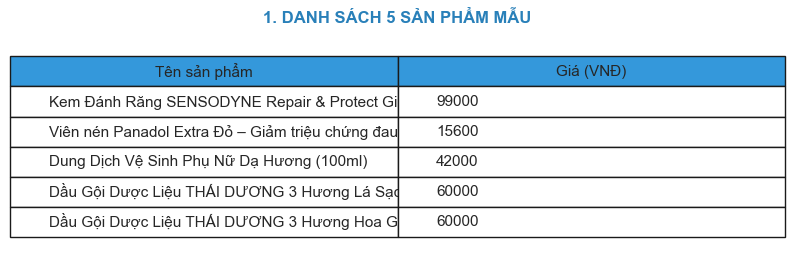

In [21]:


# Lấy 5 sản phẩm, chỉ lấy tên và giá, bỏ _id
cursor = col.find({}, {"_id": 0, "name": 1, "price": 1}).limit(5)
df_sample = pd.DataFrame(list(cursor))

if not df_sample.empty:
    # Vẽ bảng dữ liệu
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.axis('off') # Tắt trục tọa độ
    
    # Tạo bảng
    table = ax.table(
        cellText=df_sample.values, 
        colLabels=["Tên sản phẩm", "Giá (VNĐ)"], 
        loc='center', 
        cellLoc='left',
        colColours=["#3498db"] * 2 # Màu xanh tiêu đề
    )
    
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 1.8) # Chỉnh độ cao dòng
    
    plt.title("1. DANH SÁCH 5 SẢN PHẨM MẪU", fontweight='bold', color='#2980b9')
    plt.show()
else:
    print(" Không tìm thấy dữ liệu.")

# LỌC SẢN PHẨM THEO GIÁ 1K-50K, 50K-100K, 100K-500K.

C:\Users\Admin\AppData\Local\Temp\ipykernel_50976\2192930827.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=range_counts.index, y=range_counts.values, palette="Greens_d")


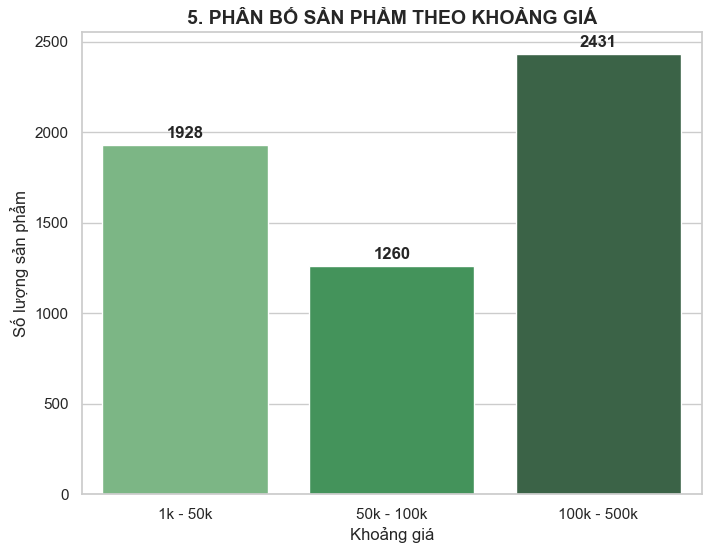

In [22]:

# Lấy cột giá về để xử lý
cursor = col.find({}, {"_id": 0, "price": 1})
df_price = pd.DataFrame(list(cursor))

# Tạo các khoảng giá (Bins)
bins = [1000, 50000, 100000, 500000]
labels = ['1k - 50k', '50k - 100k', '100k - 500k']

# Chia nhóm
df_price['price_range'] = pd.cut(df_price['price'], bins=bins, labels=labels)

# Đếm số lượng
range_counts = df_price['price_range'].value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=range_counts.index, y=range_counts.values, palette="Greens_d")

plt.title("5. PHÂN BỐ SẢN PHẨM THEO KHOẢNG GIÁ", fontweight='bold', fontsize=14)
plt.ylabel("Số lượng sản phẩm")
plt.xlabel("Khoảng giá")

# Hiện số trên đầu cột
for i in ax.containers:
    ax.bar_label(i, padding=3, fontweight='bold')

plt.show()

# SO SÁNH NGUỒN GIÁ ( WEB VÀ COMMENT )

 Đang vẽ biểu đồ nguồn giá (cột 'price_source')...
 Tìm thấy các nguồn giá:
              _id  count
0  Không tìm thấy     69
1         Comment   2426
2             Web   3709


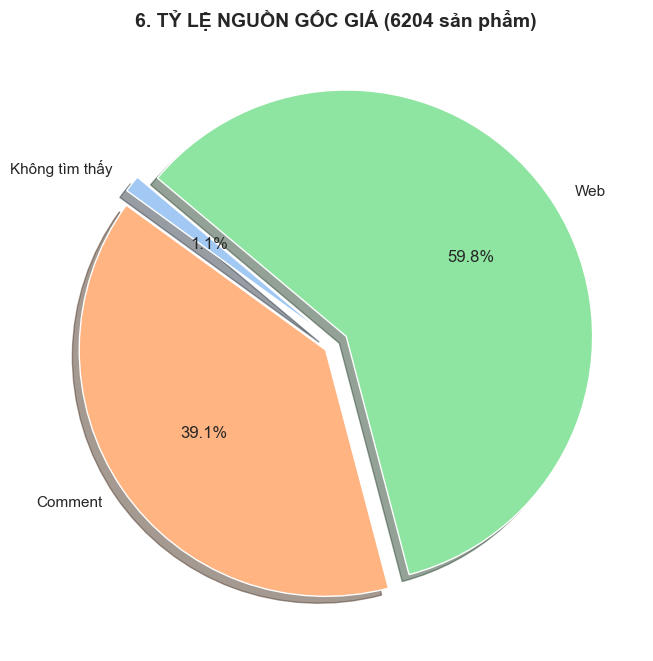

In [25]:


def plot_price_source_lowercase():
    print(" Đang vẽ biểu đồ nguồn giá (cột 'price_source')...")

    # 1. Gom nhóm theo 'price_source' (chữ thường)
    pipeline = [
        # Lọc bỏ các bản ghi không có trường này (nếu cần)
        {"$match": {"price_source": {"$exists": True, "$ne": None}}},
        # Đếm số lượng
        {"$group": {"_id": "$price_source", "count": {"$sum": 1}}}
    ]
    
    data = list(col.aggregate(pipeline))
    df = pd.DataFrame(data)

    # 2. Kiểm tra dữ liệu
    if df.empty:
        print(" Vẫn không tìm thấy dữ liệu trong cột 'price_source'.")
        print(" Bạn hãy kiểm tra lại xem trong MongoDB có dữ liệu ở trường này không nhé.")
        return

    print(" Tìm thấy các nguồn giá:")
    print(df)

    # 3. Vẽ biểu đồ
    plt.figure(figsize=(8, 8))
    
    # --- [QUAN TRỌNG] Tự động tính toán explode để tránh lỗi ValueError ---
    # Nếu có N nhóm thì tạo ra list explode có N phần tử
    num_slices = len(df)
    my_explode = [0.05] * num_slices if num_slices > 0 else None

    # Vẽ
    plt.pie(
        df['count'], 
        labels=df['_id'], 
        autopct='%1.1f%%', 
        startangle=140, 
        explode=my_explode, # Dùng biến động này sẽ không bao giờ lỗi
        shadow=True,
        colors=sns.color_palette("pastel")[0:num_slices] # Tự động lấy màu đẹp
    )
    
    plt.title(f"6. TỶ LỆ NGUỒN GỐC GIÁ ({sum(df['count'])} sản phẩm)", fontweight='bold', fontsize=14)
    plt.show()

if __name__ == "__main__":
    plot_price_source_lowercase()

# TOP 10 SẢN PHẨM CÓ DOANH THU CAO NHẤT

C:\Users\Admin\AppData\Local\Temp\ipykernel_50976\2439790301.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_revenue, y='name', x='revenue', palette='Oranges_r')
C:\Users\Admin\AppData\Local\Temp\ipykernel_50976\2439790301.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


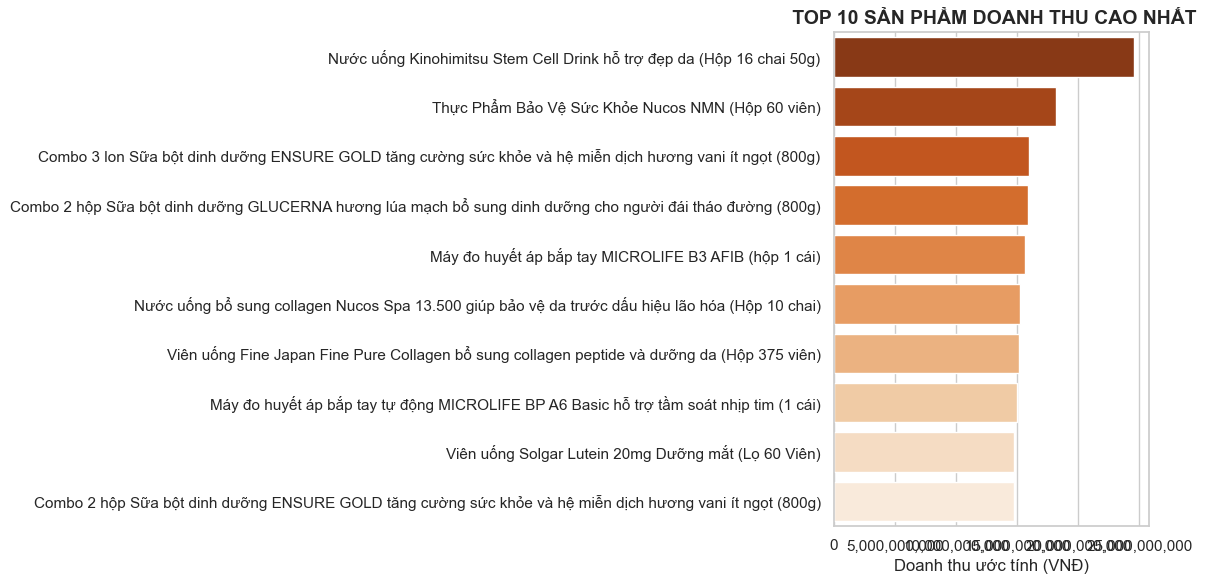

In [26]:

pipeline_revenue = [
    # 1. Tính doanh thu (xử lý nếu metrics.sold bị null thì tính là 0)
    {"$addFields": {
        "revenue": { "$multiply": ["$price", { "$ifNull": ["$metrics.sold", 0] }] }
    }},
    # 2. Sắp xếp giảm dần
    {"$sort": {"revenue": -1}},
    # 3. Lấy 10 cái đầu
    {"$limit": 10},
    # 4. Chỉ lấy tên và doanh thu
    {"$project": {"name": 1, "revenue": 1}}
]

df_revenue = pd.DataFrame(list(col.aggregate(pipeline_revenue)))

if not df_revenue.empty:
    plt.figure(figsize=(12, 6))
    
    # Vẽ biểu đồ cột ngang (barplot)
    ax = sns.barplot(data=df_revenue, y='name', x='revenue', palette='Oranges_r')
    
    plt.title(" TOP 10 SẢN PHẨM DOANH THU CAO NHẤT", fontweight='bold', fontsize=14)
    plt.xlabel("Doanh thu ước tính (VNĐ)")
    plt.ylabel("")
    
    # Format trục X thành tiền tệ (Ví dụ: 100,000,000)
    current_values = plt.gca().get_xticks()
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
    
    plt.tight_layout()
    plt.show()
else:
    print(" Không tính được doanh thu (kiểm tra lại trường metrics.sold).")

# CÁC SẢN PHẨM "VITAMIN" 

C:\Users\Admin\AppData\Local\Temp\ipykernel_50976\303476324.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


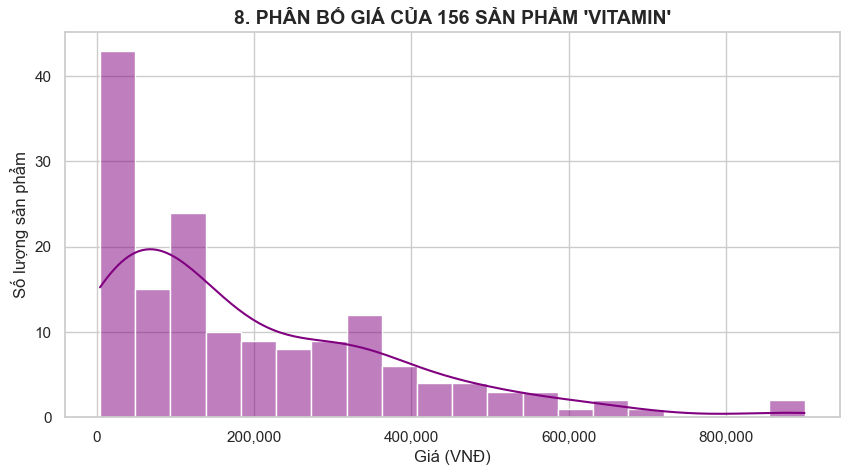

In [27]:


# Tìm tên có chữ Vitamin (không phân biệt hoa thường 'i')
query = {"name": {"$regex": "Vitamin", "$options": "i"}}
cursor_vitamin = col.find(query, {"price": 1})
df_vitamin = pd.DataFrame(list(cursor_vitamin))

if not df_vitamin.empty:
    plt.figure(figsize=(10, 5))
    
    # Vẽ Histogram (Biểu đồ tần suất)
    sns.histplot(df_vitamin['price'], bins=20, kde=True, color='purple')
    
    plt.title(f"8. PHÂN BỐ GIÁ CỦA {len(df_vitamin)} SẢN PHẨM 'VITAMIN'", fontweight='bold', fontsize=14)
    plt.xlabel("Giá (VNĐ)")
    plt.ylabel("Số lượng sản phẩm")
    
    # Format trục X
    current_values = plt.gca().get_xticks()
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
    
    plt.show()
else:
    print(" Không tìm thấy sản phẩm nào tên 'Vitamin'.")